In [10]:
import numpy as np
import pandas as pd
import re
from gensim.models import Word2Vec

In [4]:
model = Word2Vec.load_word2vec_format('/home/ec2-user/data/word2vec/GoogleNews-vectors-negative300.bin', binary=True)

In [26]:
has_digit = re.compile('([0-9]|units|xby)')

def avgw2v(s):
    if s:
        c = 0
        t = np.zeros(300)
        for w in s.split():
            if not has_digit.search(w) and w in model:
                t += model[w]
                c += 1
        if c > 0:
            return t/c
        else:
            return t
    else:
        return np.zeros(300)
    
#np.dot(avgw2v('dsfdfdfd book bracket Sreer'), avgw2v('bracket lamp read read'))

In [11]:
loc = '/home/ec2-user/data/hd/features/%s'
queries = pd.read_pickle(loc % 'FEATURES_WITH_TEXT_1.data')

q_vec = queries['query'].apply(avgw2v)
t_vec = queries['product_title'].apply(avgw2v)
d_vec = queries['product_description'].apply(avgw2v)

all_vec = pd.DataFrame({'w2v_q': q_vec, 'w2v_t': t_vec, 'w2v_d': d_vec})
all_vec.to_pickle('WORD2VEC_ALL')

In [78]:
all_vec = pd.read_pickle('WORD2VEC_ALL')

,w2v_d,w2v_q,w2v_t
id,,,
1,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0376018844545, 0.0500394329429, -0.03152773...","[-0.00186114124954, 0.0233284708112, -0.018777..."
2,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0107074677944, 0.0139652146026, -0.05871850...","[-0.00186114124954, 0.0233284708112, -0.018777..."
3,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0127446381375, 0.0762946121395, -0.02950597...","[-0.00186114124954, 0.0233284708112, -0.018777..."
4,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[-0.0200245970239, 0.0660118572414, -0.0250410...","[-0.00186114124954, 0.0233284708112, -0.018777..."
5,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0436171131829, 0.0350617634443, -0.00935281...","[-0.00186114124954, 0.0233284708112, -0.018777..."
6,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0129174841568, 0.0693740099669, 0.017240819...","[-0.00186114124954, 0.0233284708112, -0.018777..."
7,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[-0.000468009151518, 0.0340216507514, -0.01057...","[-0.00186114124954, 0.0233284708112, -0.018777..."
8,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[-0.036560151726, 0.0385268756509, -0.02789601...","[-0.00186114124954, 0.0233284708112, -0.018777..."
9,"[-0.0142432535086, 0.0327204617718, -0.0009555...","[0.00269116647542, 0.0588635224849, -0.0045644...","[-0.0204835131764, 0.0414160404354, -0.0315966..."


In [83]:
all_vec['w2v_t']

id
1         [-0.00186114124954, 0.0233284708112, -0.018777...
2         [-0.00186114124954, 0.0233284708112, -0.018777...
3         [-0.00186114124954, 0.0233284708112, -0.018777...
4         [-0.00186114124954, 0.0233284708112, -0.018777...
5         [-0.00186114124954, 0.0233284708112, -0.018777...
6         [-0.00186114124954, 0.0233284708112, -0.018777...
7         [-0.00186114124954, 0.0233284708112, -0.018777...
8         [-0.00186114124954, 0.0233284708112, -0.018777...
9         [-0.0204835131764, 0.0414160404354, -0.0315966...
10        [0.00467737419531, 0.00813690572977, -0.026072...
11        [0.00467737419531, 0.00813690572977, -0.026072...
12        [0.00467737419531, 0.00813690572977, -0.026072...
13        [-0.0341349553006, 0.0319755370729, -0.0063194...
16        [-0.0061477888693, 0.0387907115192, -0.0100207...
17        [-0.0061477888693, 0.0387907115192, -0.0100207...
14        [-0.0061477888693, 0.0387907115192, -0.0100207...
15        [-0.0061477888693, 0.038790

In [86]:
dotqt = all_vec.apply(lambda r: np.dot(r['w2v_q'], r['w2v_t']), axis=1)

In [104]:
dotqd = all_vec.apply(lambda r: np.dot(r['w2v_q'], r['w2v_d']), axis=1)

In [105]:
dotqt.name = 'dotqp'
dotqd.name = 'dotqd'

In [88]:
loc = '/home/ec2-user/data/hd/features/%s'
idx_train = pd.read_pickle(loc % 'LABELS_TRAIN.df')
idx_test = pd.read_pickle(loc % 'LABELS_TEST.df')

In [36]:
woqta.columns = ['id', 'woqt1', 'woqt2', 'woqt3', 'woqt4', 'woqt5', 'woqt6']
woqta['id'] = woqta['id'].astype(int)
woqta.set_index('id', inplace=True)

WOQTA_TRAIN = idx_train.join(woqta)
WOQTA_TEST = idx_test.join(woqta)

WOQTA_TRAIN.to_pickle('WOQTAL_TRAIN_147')
WOQTA_TEST.to_pickle('WOQTAL_TEST_147')

False

In [106]:
aaa = idx_train.join(dotqt)
bbb = idx_train.join(dotqd)

In [96]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/usr/local/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


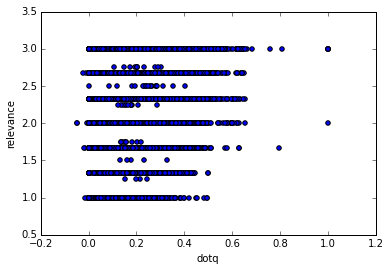

In [97]:
aaa.plot.scatter('dotq', 'relevance')

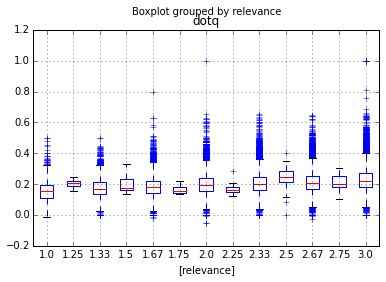

In [103]:
aaa.boxplot(by='relevance')

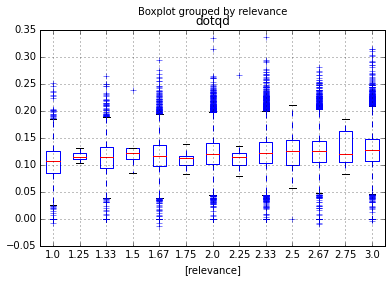

In [107]:
bbb.boxplot(by='relevance')